In [1]:
# 데이터 불러오기

In [2]:
import os
import numpy as np

import import_ipynb
import khoa

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

importing Jupyter notebook from khoa.ipynb


In [3]:
dir_path = '../data/buoy'

In [4]:
file_path_list = khoa.path_khoa(dir_path)

In [5]:
data_khoa = np.empty(shape=(0,4))

In [6]:
date_time = np.empty(shape=(0), dtype='datetime64')

In [7]:
file_path = file_path_list[2]

In [8]:
header, date_time_single, data = khoa.load_khoa_wave_wind(file_path)
data_khoa = np.append(data_khoa, data, axis=0)
np.array(date_time_single)
date_time = np.concatenate((date_time, date_time_single), axis=0)

유의파고, 최대파고, 풍속, 풍향


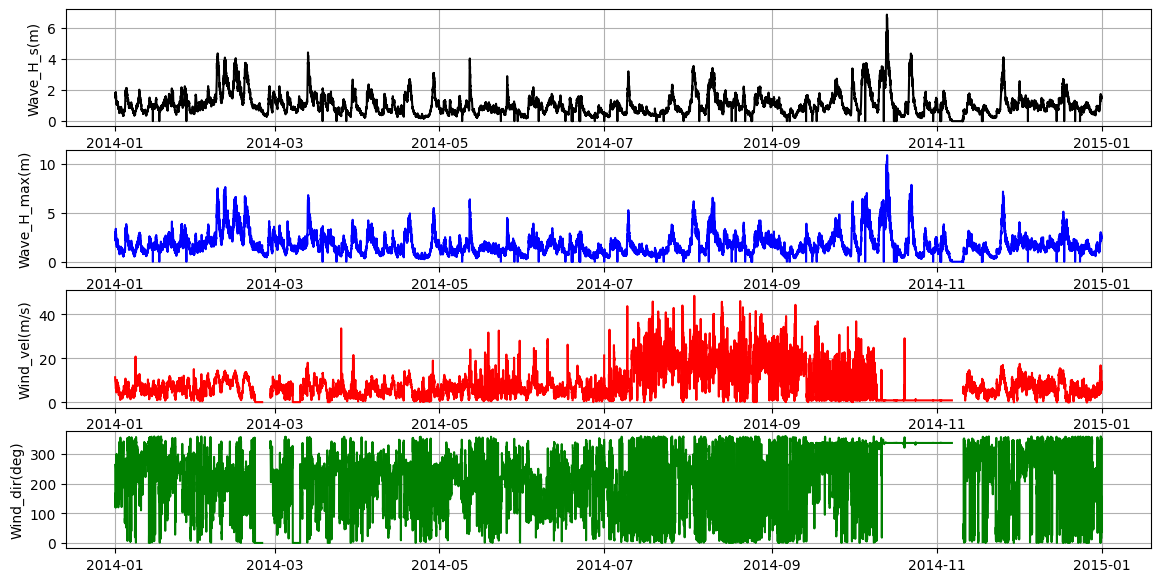

In [68]:
fig = plt.figure(figsize=(14,7))
gs = GridSpec(nrows=4, ncols=1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[2,0])
ax3 = fig.add_subplot(gs[3,0])
ax0.plot(date_time, data_khoa[:,0], 'k')
ax1.plot(date_time, data_khoa[:,1], 'b')
ax2.plot(date_time, data_khoa[:,2], 'r')
ax3.plot(date_time, data_khoa[:,3], 'g')
ax0.set_ylabel('Wave_H_s(m)')
ax1.set_ylabel('Wave_H_max(m)')
ax2.set_ylabel('Wind_vel(m/s)')
ax3.set_ylabel('Wind_dir(deg)')
ax0.grid(True)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
plt.show()

In [10]:
idx_end = 10000

In [11]:
date_time_ = date_time[:idx_end]
wave_h_s = data_khoa[:idx_end,0]
wave_h_max = data_khoa[:idx_end,1]
wind_vel = data_khoa[:idx_end,2]
wind_dir = data_khoa[:idx_end,3]

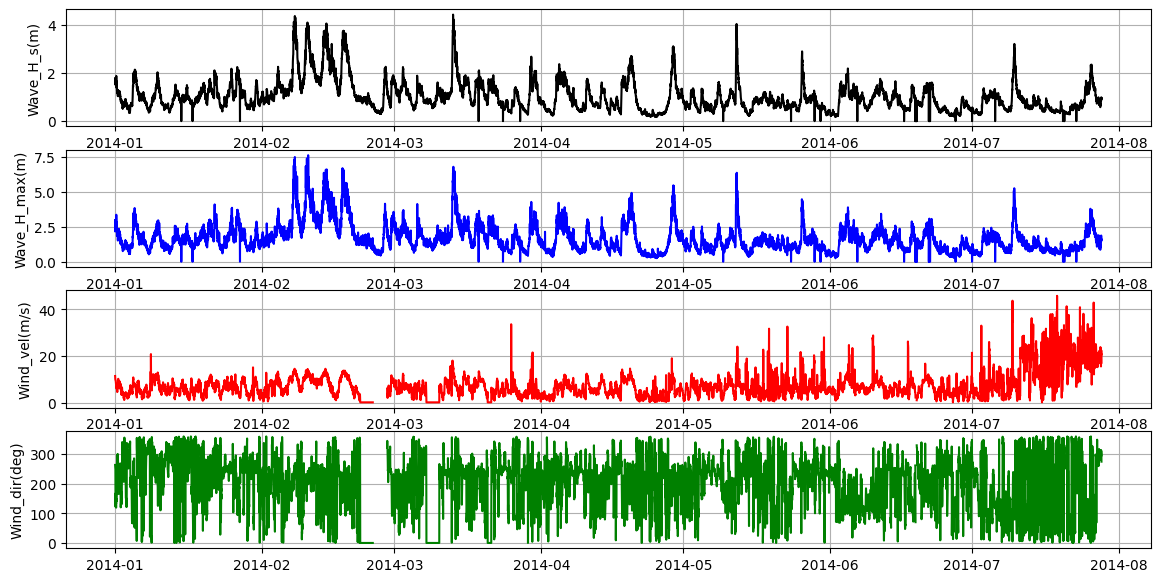

In [12]:
fig = plt.figure(figsize=(14,7))
gs = GridSpec(nrows=4, ncols=1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[2,0])
ax3 = fig.add_subplot(gs[3,0])
ax0.plot(date_time_, wave_h_s, 'k')
ax1.plot(date_time_, wave_h_max, 'b')
ax2.plot(date_time_, wind_vel, 'r')
ax3.plot(date_time_, wind_dir, 'g')
ax0.set_ylabel('Wave_H_s(m)')
ax1.set_ylabel('Wave_H_max(m)')
ax2.set_ylabel('Wind_vel(m/s)')
ax3.set_ylabel('Wind_dir(deg)')
ax0.grid(True)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
plt.show()

In [13]:
# 선형 회귀

In [59]:
X = wave_h_s[:20]
y = wave_h_max[:20]

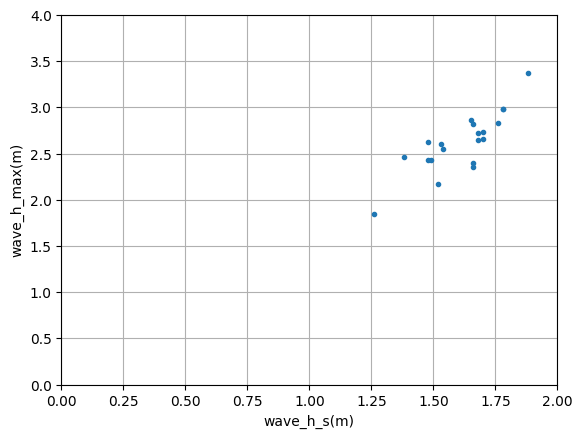

In [60]:
plt.plot(X, y,'.')
plt.grid(True)
plt.xlabel('wave_h_s(m)')
plt.ylabel('wave_h_max(m)')
plt.axis([0, 2, 0, 4])
plt.show()

In [61]:
X_b = np.c_[np.ones((20,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [62]:
X_new = np.array([[0],[2]])

In [63]:
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([-0.27251801,  3.31783589])

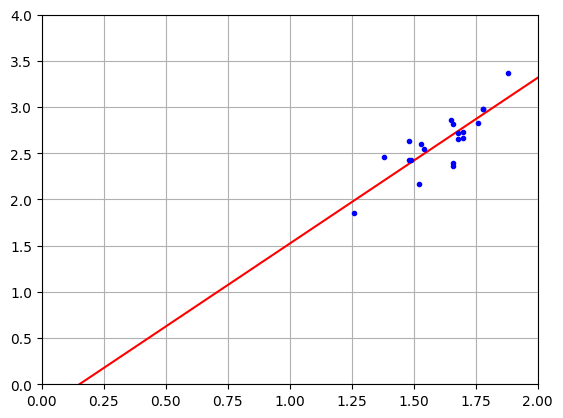

In [67]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.grid(True)
plt.axis([0, 2, 0, 4])
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [46]:
X_ = np.expand_dims(X,axis=1)
y_ = np.expand_dims(y,axis=1)

In [47]:
lin_reg.fit(X_,y_)

LinearRegression()

In [49]:
lin_reg.intercept_, lin_reg.coef_

(array([-0.27251801]), array([[1.79517695]]))

In [55]:
lin_reg.predict(X_new)

array([[1.52265894],
       [3.31783589]])

In [15]:
# 데이터 정제 (입력: 풍속, 풍향 / 출력: 파랑)

In [16]:
# 선형 회귀 (최소제곱법)

In [17]:
# 선형 